# Data Collection and Provenance

## Project Overview
This project focuses on customer segmentation using retail data. I aim to apply unsupervised learning techniques (K-Means and Hierarchical Clustering) to identify distinct customer groups based on demographics and spending behavior.

## Data Source and Description
The dataset used is `Mall_Customers.csv`, which contains the following columns:
- **CustomerID:** Unique identifier for each customer.
- **Gender:** The gender of the customer.
- **Age:** The age of the customer.
- **Annual Income (k$):** Customer's annual income in thousands.
- **Spending Score (1-100):** A score indicating the customer's spending behavior.

**Origin:** The dataset is a commonly used sample for customer segmentation analysis. (https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data)

## Environment Setup Using Poetry and WSL
I used [Poetry](https://python-poetry.org/) for dependency management and WSL within VS Code IDE for a consistent development environment.

### Initializing the Project with Poetry:
```bash
poetry init --no-interaction
poetry add pandas matplotlib seaborn jupyter yellowbrick scipy sklearn


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

<center>

# **EDA - Exploratory Data Analysis**

</center>

In [64]:
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

df = pd.read_csv('data/Mall_Customers.csv')

print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()
print("\nFirst few rows:")
df.head()

Dataset Shape: (200, 5)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

First few rows:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [65]:
numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
print("Statistical Summary of Numerical Variables:")
df[numerical_cols].describe()

Statistical Summary of Numerical Variables:


,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


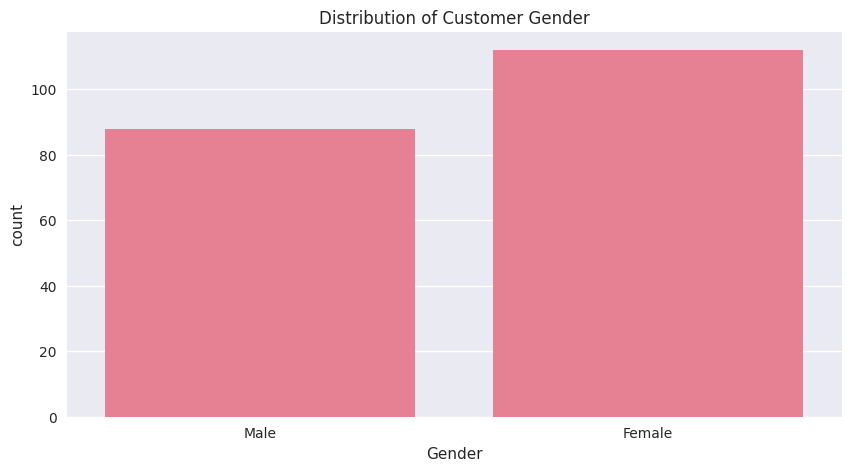


Gender Distribution (%):
 Gender
Female    56.0
Male      44.0
Name: proportion, dtype: float64


In [66]:
# Gender distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Gender')
plt.title('Distribution of Customer Gender')
plt.show()

gender_dist = df['Gender'].value_counts(normalize=True) * 100
print("\nGender Distribution (%):\n", gender_dist)

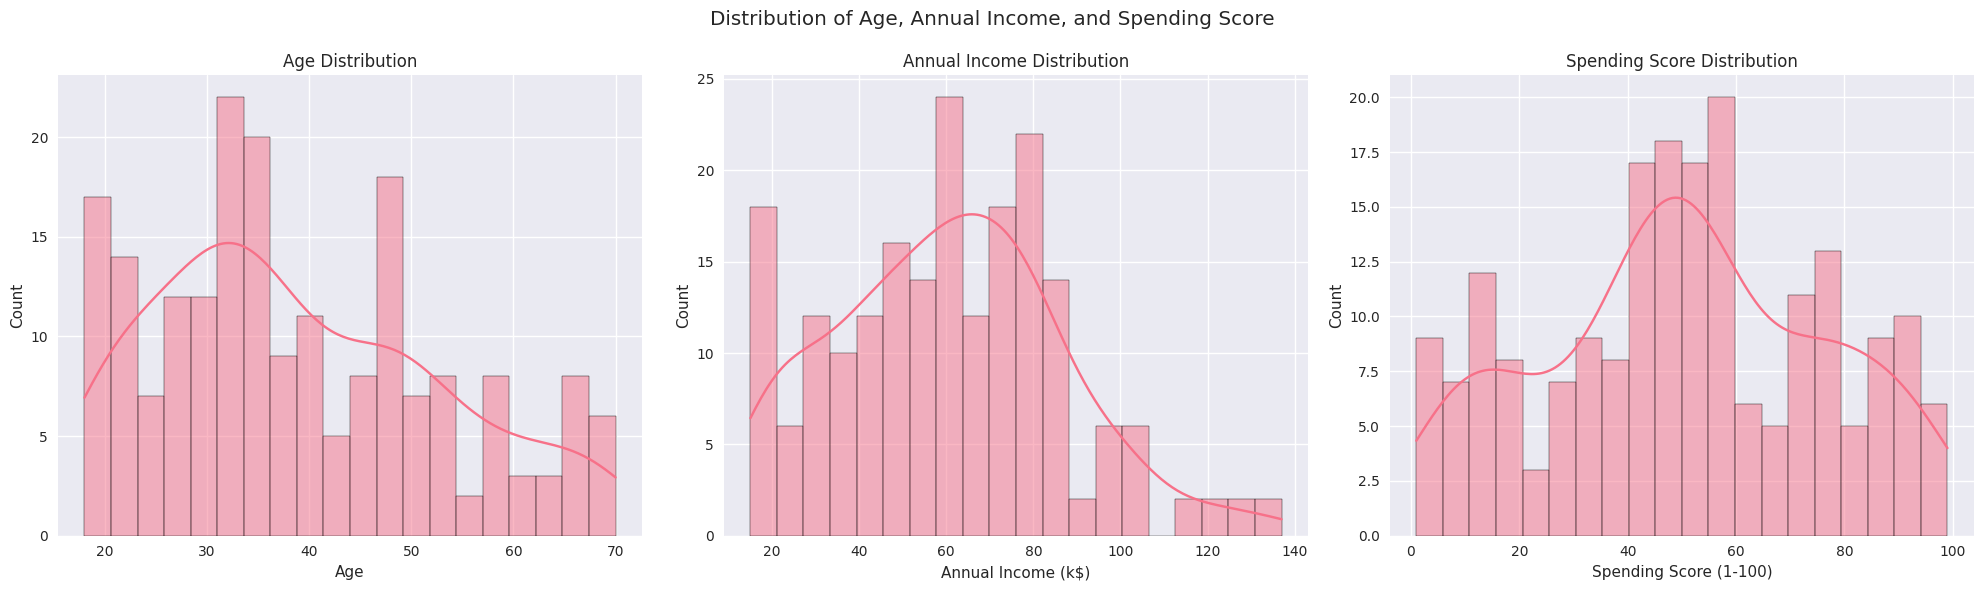

In [67]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Distribution of Age, Annual Income, and Spending Score')

# Age distribution
sns.histplot(data=df, x='Age', bins=20, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

# Annual Income distribution
sns.histplot(data=df, x='Annual Income (k$)', bins=20, kde=True, ax=axes[1])
axes[1].set_title('Annual Income Distribution')

# Spending Score distribution
sns.histplot(data=df, x='Spending Score (1-100)', bins=20, kde=True, ax=axes[2])
axes[2].set_title('Spending Score Distribution')

plt.tight_layout()
plt.show()

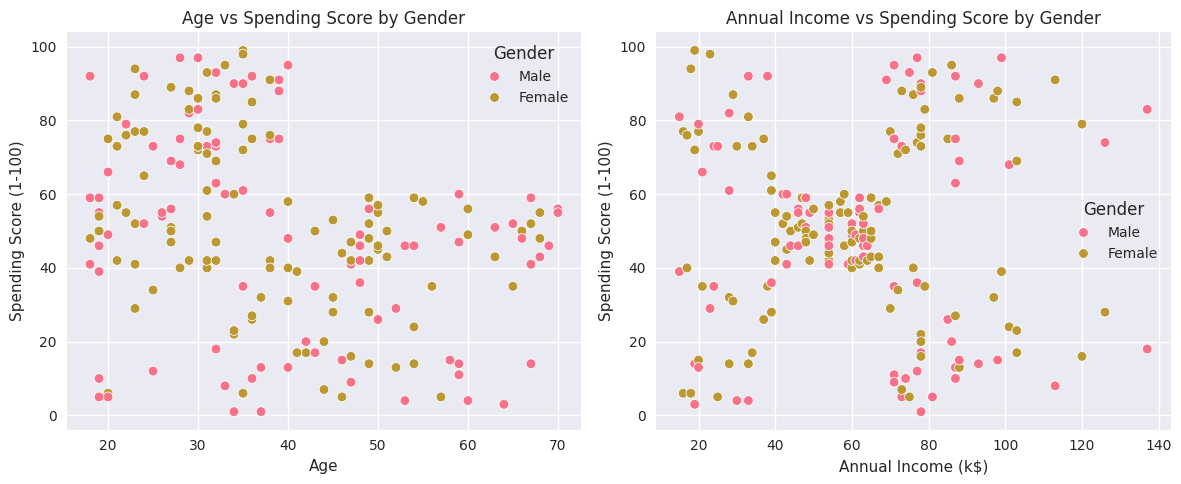

In [68]:
# relationships visualizations
plt.figure(figsize=(12, 5))

# Age vs Spending Score with gender encoding
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Gender')
plt.title('Age vs Spending Score by Gender')

# Annual Income vs Spending Score with gender encoding
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title('Annual Income vs Spending Score by Gender')

plt.tight_layout()
plt.show()

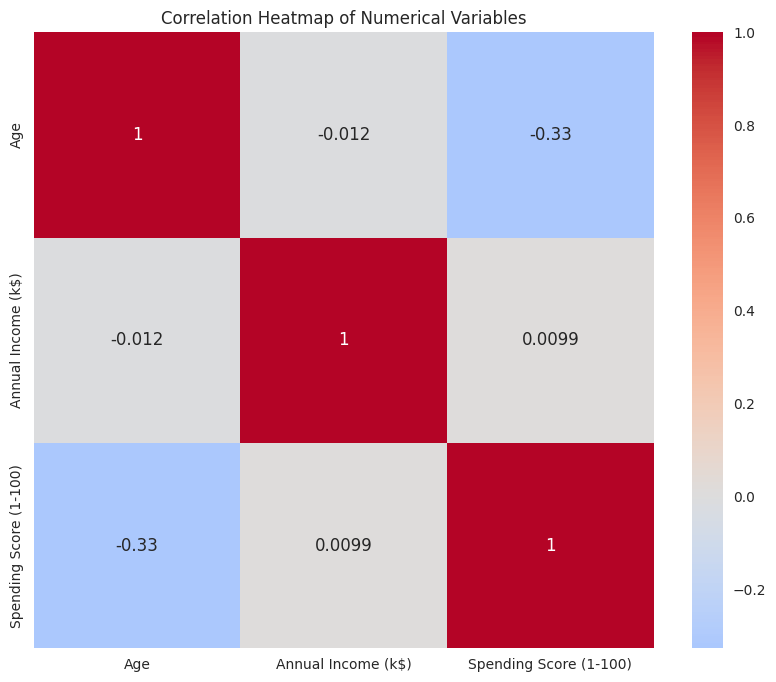

In [69]:
# Correlation heatmap
numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

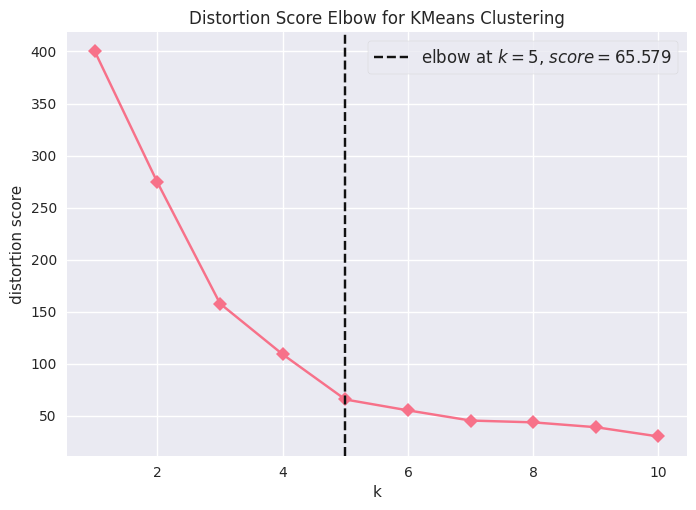

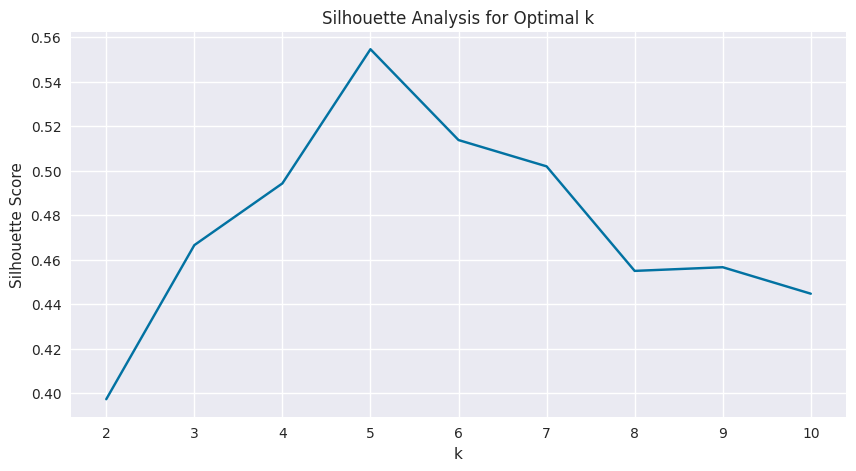

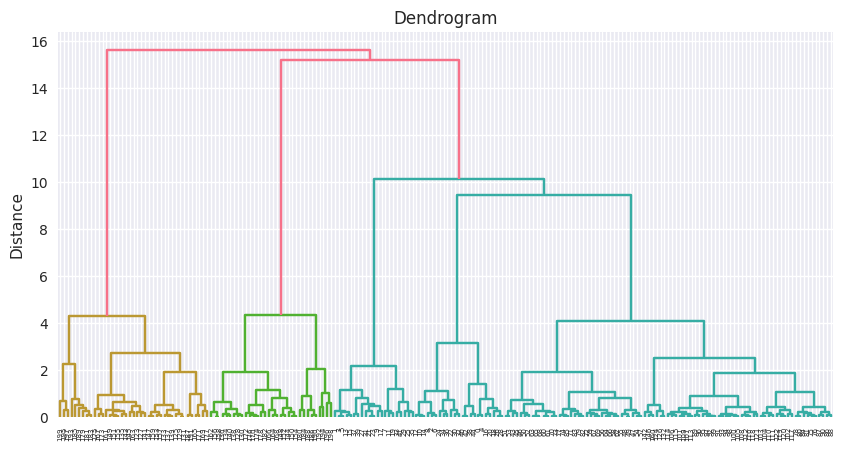

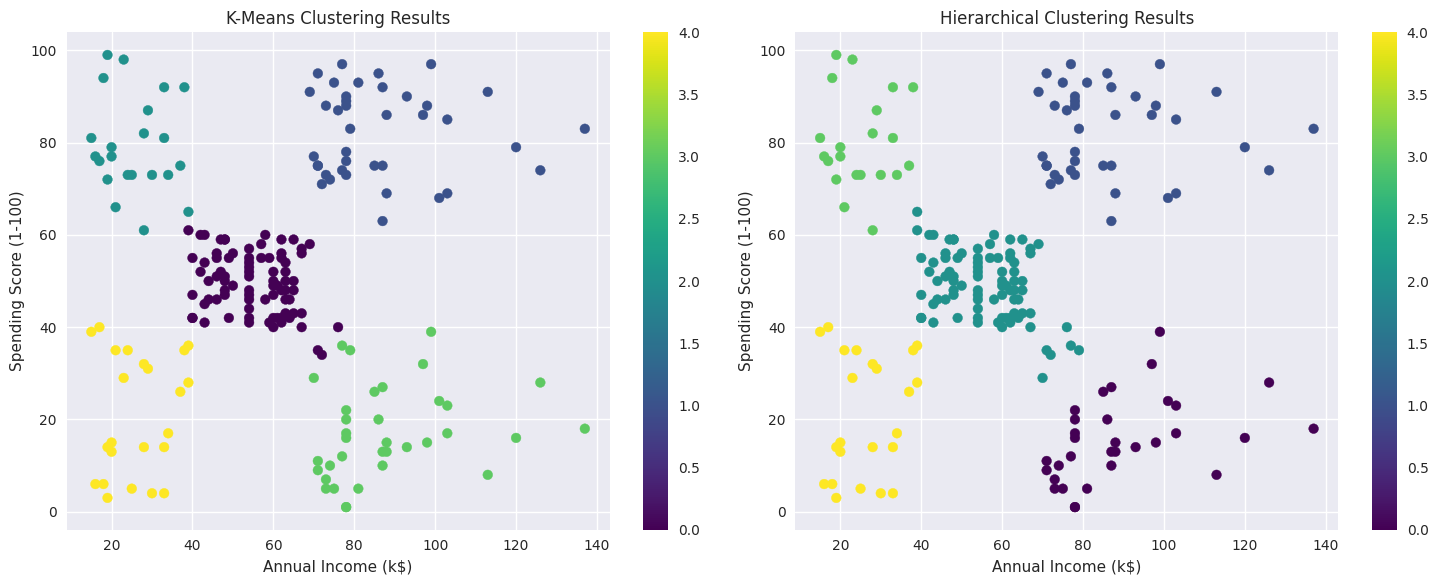


Clustering Comparison:
K-Means Silhouette Score: 0.555
Hierarchical Clustering Silhouette Score: 0.554

K-Means Cluster Characteristics:
        Annual Income (k$)          Spending Score (1-100)            Age  \
                      mean min  max                   mean min max   mean   
Cluster                                                                     
0                    55.30  39   76                  49.52  34  61  42.72   
1                    86.54  69  137                  82.13  63  97  32.69   
2                    25.73  15   39                  79.36  61  99  25.27   
3                    88.20  70  137                  17.11   1  39  41.11   
4                    26.30  15   39                  20.91   3  40  45.22   

          Gender  
        <lambda>  
Cluster           
0         Female  
1         Female  
2         Female  
3           Male  
4         Female  


In [ ]:
# Prepare the features for clustering
# I'll use Annual Income and Spending Score as our main features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. K-Means Analysis
# Use elbow method to find optimal k
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11), metric='distortion', timings=False)
visualizer.fit(X_scaled)
optimal_k = visualizer.elbow_value_
visualizer.show()

# Silhouette Analysis
plt.figure(figsize=(10, 5))
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()

# 2. Hierarchical Clustering Analysis
# Create dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.ylabel('Distance')
plt.show()

# Fit K-Means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Fit Hierarchical Clustering with the same number of clusters as K-Means
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Visualize both clustering results
plt.figure(figsize=(15, 6))

# K-Means results
plt.subplot(1, 2, 1)
scatter = plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering Results')
plt.colorbar(scatter)

# Hierarchical clustering results
plt.subplot(1, 2, 2)
scatter = plt.scatter(X[:, 0], X[:, 1], c=hierarchical_labels, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Hierarchical Clustering Results')
plt.colorbar(scatter)

plt.tight_layout()
plt.show()

# Compare the clustering results
print("\nClustering Comparison:")
print(f"K-Means Silhouette Score: {silhouette_score(X_scaled, kmeans_labels):.3f}")
print(f"Hierarchical Clustering Silhouette Score: {silhouette_score(X_scaled, hierarchical_labels):.3f}")

# Analyze cluster characteristics
kmeans_df = df.copy()
kmeans_df['Cluster'] = kmeans_labels

print("\nK-Means Cluster Characteristics:")
print(kmeans_df.groupby('Cluster').agg({
    'Annual Income (k$)': ['mean', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'min', 'max'],
    'Age': 'mean',
    'Gender': lambda x: x.value_counts().index[0]  # most common gender
}).round(2))

## Clustering Analysis Summary

### Model Comparison
- **K-Means Clustering**
  - **Silhouette Score**: 0.555
  - **Characteristics**:
    - Cluster 0: Moderate income and spending, older, predominantly female.
    - Cluster 1: High income and spending, younger, predominantly female.
    - Cluster 2: Low income, high spending, younger, predominantly female.
    - Cluster 3: High income, low spending, middle-aged, predominantly male.
    - Cluster 4: Low income and spending, older, predominantly female.

- **Hierarchical Clustering**
  - **Silhouette Score**: 0.554
  - **Characteristics**: Similar patterns to K-Means, confirming cluster validity.

### Observations
- **Optimal Clusters**: Both methods suggest 5 clusters, supported by the elbow and silhouette analyses.
- **Cluster Patterns**:
  - Clear segmentation based on income and spending behavior.
  - Gender and age distributions provide additional insights for targeted strategies.

### Business Implications
- **Targeted Marketing**: Tailor strategies for high-spending clusters (e.g., Cluster 1).
- **Customer Retention**: Focus on low-spending clusters (e.g., Cluster 4) to improve engagement.
- **Product Development**: Consider age and gender preferences within clusters for product offerings.

### Conclusion
Both K-Means and Hierarchical Clustering provide consistent and actionable insights into customer segmentation. The similar silhouette scores indicate that both models capture the underlying patterns effectively, allowing for informed business decisions.